## 4-1 IMDB 데이터셋 로드하기

In [1]:
from tensorflow.keras.datasets import reuters
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

2023-07-28 13:43:14.372808: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-28 13:43:14.409532: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000
)

## 4-2 리뷰를 다시 텍스트로 디코딩하기

In [3]:
word_index = imdb.get_word_index() # word_index는 단어와 정수 인덱스를 매핑한 dictionary입니다.
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = " ".join(
    # 리뷰를 디코딩합니다.
    # 0, 1, 2는 각각 "패딩", "문서 시작", "사전에 없음"을 위해 예약되어 있으므로 인덱스에서 3을 뺍니다.
    # 즉, 현재의 word_index 상에서는 존재하지 않음. i-3이 dict에 존재하면 가져오고 없으면 ?로 남겨놓음.
    # 출략 결과가 "? this file was just brilliant casting ..." 이렇게 나오는데, train_data[0]의 첫 번째 원소가 문서의 시작을 알리는 1입니다.
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]] 
)

## 데이터 준비
### 정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # 크기가 (len(sequences), dimension)이고 모든 우너소가 0인 행렬을 만듭니다.
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1. # reulsts의 특정 index를 1로 함
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## 신경망 모델 만들기
### 모델 정의하기


In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
])

2023-07-28 13:43:21.647008: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8035 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:1a:00.0, compute capability: 8.6


### 모델 컴파일하기

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 훈련 검증
### 검증 세트 준비하기

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 모델 훈련하기

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2023-07-28 13:43:23.844426: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-28 13:43:23.847824: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f98c8206310 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-28 13:43:23.847846: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-07-28 13:43:23.853050: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-28 13:43:25.091851: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8902
2023-07-28 13:43:25.135680: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-07-28 13:43:25.20211

30/30 [==============================] - 4s 31ms/step - loss: 0.5678 - accuracy: 0.7623 - val_loss: 0.4534 - val_accuracy: 0.8588
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3722 - accuracy: 0.8915 - val_loss: 0.3452 - val_accuracy: 0.8777
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2733 - accuracy: 0.9119 - val_loss: 0.3007 - val_accuracy: 0.8851
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2163 - accuracy: 0.9312 - val_loss: 0.2936 - val_accuracy: 0.8814
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1789 - accuracy: 0.9433 - val_loss: 0.2996 - val_accuracy: 0.8786
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1507 - accuracy: 0.9531 - val_loss: 0.2924 - val_accuracy: 0.8819
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1243 - accuracy: 0.9633 - val_loss: 0.2865 - val_accuracy: 0.8865
Epoch 8/20
30/30 [======

### 훈련과 검증 손실 그리기

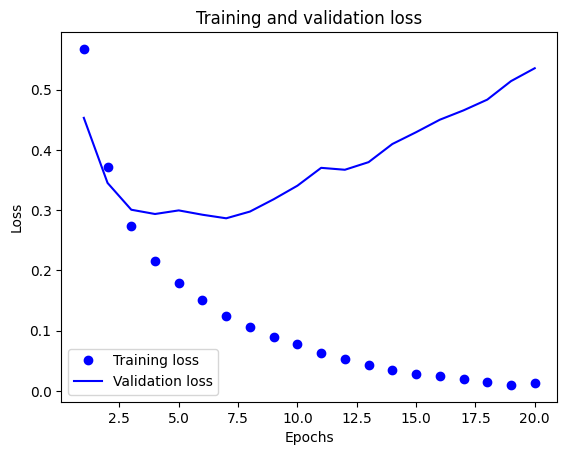

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 훈련과 검증 정확도 그리기

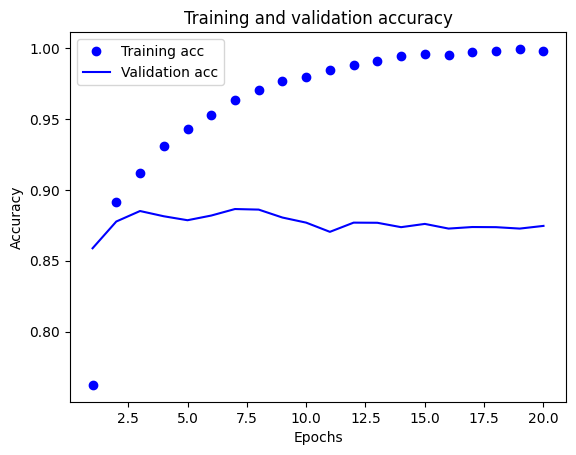

In [11]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4750 - accuracy: 0.8109
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2791 - accuracy: 0.9010
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2145 - accuracy: 0.9227
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2903 - accuracy: 0.8825


In [13]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.20172222],
       [0.9994443 ],
       [0.7066863 ],
       ...,
       [0.10216368],
       [0.05653515],
       [0.4843268 ]], dtype=float32)

(100,) (100,) 0 1
16.87316898942787 -7.073729617970939 16.87316898942787 -7.073729617970939 -max_x, min_x, max_y, min_y


/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.8/site-pa

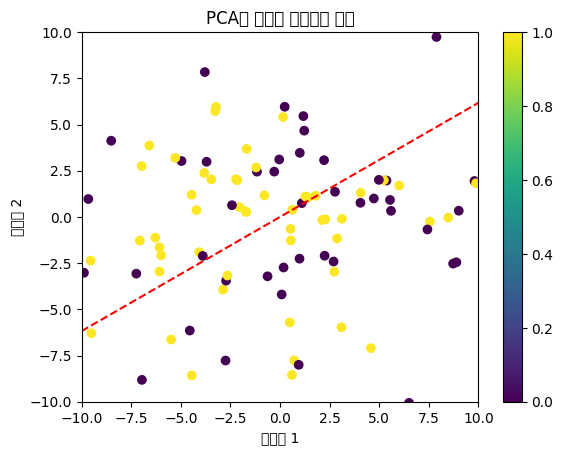

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 랜덤 데이터 생성
# np.random.seed(0)
num_samples = 100
num_features = 2
num_classes = 2

data = np.random.randn(num_samples, num_features) * 5
labels = np.random.randint(0, num_classes, num_samples)

# PCA로 2차원으로 차원 축소
pca = PCA(n_components=2)
data_transformed = pca.fit_transform(data)

# 클래스 별로 데이터 분리
class_data = {}
for i in range(num_classes):
    class_data[i] = data_transformed[labels == i]

# 클래스 별 평균 계산
class_means = {}
for i in range(num_classes):
    class_means[i] = np.mean(class_data[i], axis=0)

# 이분하는 직선 시각화 함수 정의
def plot_bisecting_line(class1, class2):
    direction_vector = class_means[class2] - class_means[class1]
    direction_vector /= np.linalg.norm(direction_vector)

    mid_point = (class_means[class1] + class_means[class2]) / 2

    slope = direction_vector[1] / direction_vector[0]
    intercept = mid_point[1] - slope * mid_point[0]

    x_range = np.linspace(min(data_transformed[:, 0]), max(data_transformed[:, 0]), 100)
    y_range = slope * x_range + intercept
    print(x_range.shape, y_range.shape, class1, class2)
    return x_range, y_range

# 55개의 직선 시각화
import math
max_x, min_x = -math.inf, math.inf
max_y, min_y = -math.inf, math.inf
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=labels, cmap='viridis')
for class1 in range(num_classes - 1):
    for class2 in range(class1 + 1, num_classes):
        x_range, y_range = plot_bisecting_line(class1, class2)
        max_x = max(max(x_range), max_x)
        max_y = max(max(x_range), max_x)
        min_x = min(min(y_range), min_y)
        min_y = min(min(y_range), min_y)
        
        plt.plot(x_range, y_range, 'r--')
print(max_x, min_x, max_y, min_y,"-max_x, min_x, max_y, min_y" )
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel('주성분 1')
plt.ylabel('주성분 2')
plt.title('PCA와 클래스 이분하는 직선')
plt.colorbar()
plt.show()